In [47]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv('globox.csv')

In [49]:
data.group.value_counts().sort_values()

A    24343
B    24600
Name: group, dtype: int64

In [50]:
data.isnull().sum()

uid      0
group    0
spent    0
dtype: int64

In [51]:
data.columns

Index(['uid', 'group', 'spent'], dtype='object')

In [52]:
data.spent.fillna(0, inplace=True)

In [53]:
#Calculate de conversion rate for the control and treatment groups?
#Count the number of unique users in each group
control_users = set(data[data['group'] == 'A']['uid'].unique())
treatment_users = set(data[data['group'] == 'B']['uid'].unique())

#Count the number of users who made a purchase in each group
control_purchases = set(data[(data['group'] == 'A') & (data['spent'] > 0)]['uid'].unique())
treatment_purchases = set(data[(data['group'] == 'B') & (data['spent'] > 0)]['uid'].unique())

#Calculate the user conversion rate for each group
control_conversion_rate = len(control_purchases) / len(control_users)
treatment_conversion_rate = len(treatment_purchases) / len(treatment_users)

#Print the user conversion rate for each group
print("User conversion rate for the control group: {:.2f}%".format(control_conversion_rate * 100))
print("User conversion rate for the treatment group: {:.2f}%".format(treatment_conversion_rate * 100))

User conversion rate for the control group: 3.92%
User conversion rate for the treatment group: 4.63%


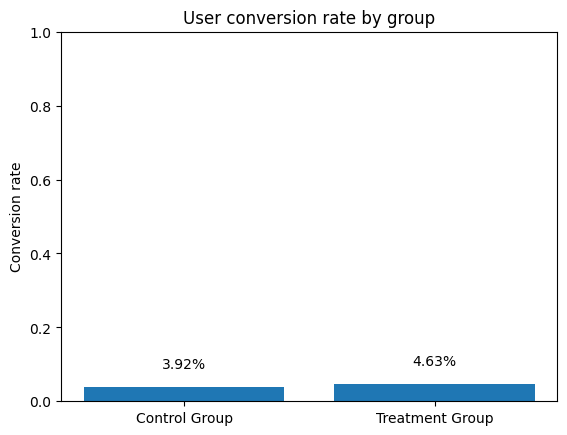

In [72]:
# Create a bar chart to visualize the user conversion rate for each group
plt.bar(['Control Group', 'Treatment Group'], [control_conversion_rate, treatment_conversion_rate])
plt.ylim(0, 1)
plt.ylabel('Conversion rate')
plt.title('User conversion rate by group')

# Add the conversion rates to the bar chart
plt.text(0, control_conversion_rate + 0.05, '{:.2f}%'.format(control_conversion_rate * 100), ha='center')
plt.text(1, treatment_conversion_rate + 0.05, '{:.2f}%'.format(treatment_conversion_rate * 100), ha='center')

plt.show()

In [73]:
#Calculate the 95% confidence interval for the difference in the conversion rate between the treatment and control (treatment-control)? This question is required.*
#Use the normal distribution and unpooled proportions for the standard error
# Calculate the difference in conversion rates
diff_conversion_rate = treatment_conversion_rate - control_conversion_rate

# Calculate the standard error of the difference in conversion rates
se_diff = np.sqrt((treatment_conversion_rate * (1 - treatment_conversion_rate) / total_treatment) + (control_conversion_rate * (1 - control_conversion_rate) / total_control))

# Calculate the 95% confidence interval using the normal distribution and unpooled proportions
ci_diff = (diff_conversion_rate - st.norm.ppf(0.975) * se_diff, diff_conversion_rate + st.norm.ppf(0.975) * se_diff)

ci_diff_rounded = (round(ci_diff[0], 4), round(ci_diff[1], 4))

# Print the 95% confidence interval for the difference in conversion rates
print("Confidence interval for the difference in conversion rates: ", ci_diff_rounded)


Confidence interval for the difference in conversion rates:  (0.0035, 0.0107)


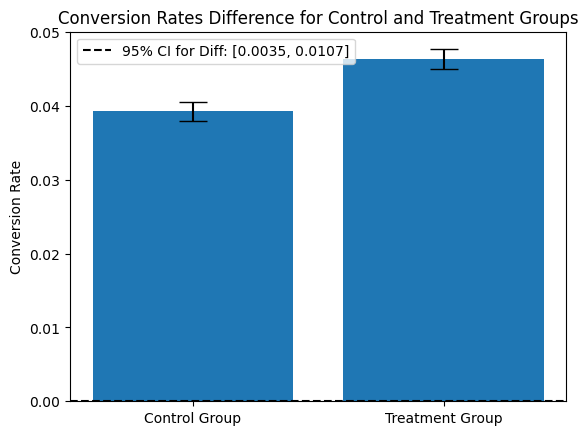

In [74]:
# Count the number of unique users in the control group
total_treatment = len(treatment_users)

# Count the number of unique users in the control group
total_control = len(treatment_users)

# Calculate the standard error of the conversion rate for treatment group
se_treatment = np.sqrt(treatment_conversion_rate * (1 - treatment_conversion_rate) / total_treatment)

# Calculate the standard error of the conversion rate for the control group
se_control = np.sqrt(control_conversion_rate * (1 - control_conversion_rate) / total_control)
# Create a bar chart with error bars for the conversion rates of the control and treatment groups
x = ['Control Group', 'Treatment Group']
y = [control_conversion_rate, treatment_conversion_rate]
y_err = [se_control, se_treatment]
plt.bar(x, y, yerr=y_err, capsize=10)

# Add a horizontal line at y=0 to indicate no difference in conversion rates
plt.axhline(y=0, color='black', linestyle='--')

# Add a title and axis labels
plt.title('Conversion Rates Difference for Control and Treatment Groups')
plt.ylabel('Conversion Rate')

# Add a legend with the 95% confidence interval for the difference in conversion rates
ci_diff_text = '95% CI for Diff: [{:.4f}, {:.4f}]'.format(ci_diff_rounded[0], ci_diff_rounded[1])
plt.legend([ci_diff_text])

# Show the plot
plt.show()

In [75]:
#Conduct a hypothesis test to see whether there is a difference in the conversion rate between the two groups. What are the resulting p-value and conclusion? This question is required.*
#Use the normal distribution and a 5% significance level. Use the pooled proportion for the standard error.

#Count the number of unique users in each group
control_users = set(data[data['group'] == 'A']['uid'].unique())
treatment_users = set(data[data['group'] == 'B']['uid'].unique())

#Count the number of users who made a purchase in each group
control_purchases = set(data[(data['group'] == 'A') & (data['spent'] > 0)]['uid'].unique())
treatment_purchases = set(data[(data['group'] == 'B') & (data['spent'] > 0)]['uid'].unique())

# Count the number of users who converted in the treatment group
converted_treatment = len(treatment_purchases)

# Count the number of users who converted in the control group
converted_control = len(control_purchases)

# Count the number of unique users in the control group
total_control = len(control_users)

# Count the number of unique users in the treatment group
total_treatment = len(treatment_users)

#Calculate the user conversion rate for each group
control_conversion_rate = len(control_purchases) / len(control_users)
treatment_conversion_rate = len(treatment_purchases) / len(treatment_users)

# Calculate the pooled proportion
pooled_proportion = (converted_control + converted_treatment) / (total_control + total_treatment)

# Calculate the standard error using the pooled proportion
se_pooled = np.sqrt(pooled_proportion * (1 - pooled_proportion) * (1/total_control + 1/total_treatment))

# Calculate the test statistic
z = (control_conversion_rate - treatment_conversion_rate) / se_pooled

# Calculate the p-value
p_value = 2 * (1 - st.norm.cdf(abs(z)))

# Round the p-value to 3 decimal places
p_value_rounded = round(p_value, 4)

# Print the rounded p-value
print("p-value:", p_value_rounded)

# Make a decision based on the p-value and significance level
if p_value < 0.05:
    print("We reject the null hypothesis that there is no difference in the user conversion rate between the control and treatment..")
else:
    print("Fail to reject the null hypothesis. There is significant difference in conversion rates between the control and treatment groups.")


p-value: 0.0001
We reject the null hypothesis that there is no difference in the user conversion rate between the control and treatment..


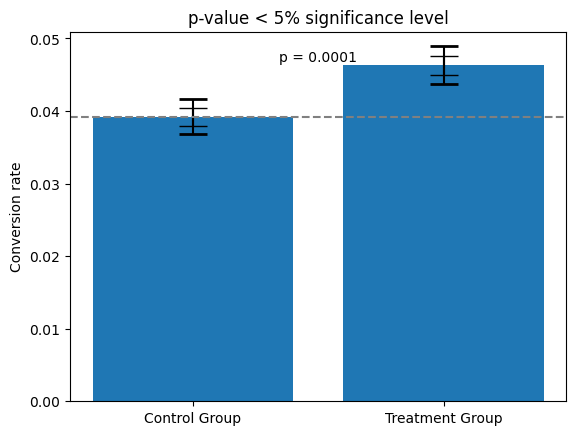

In [76]:
# Calculate the confidence interval for the control group conversion rate
se_control = np.sqrt(control_conversion_rate * (1 - control_conversion_rate) / total_control)
ci_control = (control_conversion_rate - st.norm.ppf(0.975) * se_control, control_conversion_rate + st.norm.ppf(0.975) * se_control)

# Calculate the confidence interval for the treatment group conversion rate
se_treatment = np.sqrt(treatment_conversion_rate * (1 - treatment_conversion_rate) / total_treatment)
ci_treatment = (treatment_conversion_rate - st.norm.ppf(0.975) * se_treatment, treatment_conversion_rate + st.norm.ppf(0.975) * se_treatment)

# Create a bar chart of the conversion rates
fig, ax = plt.subplots()
ax.bar(['Control Group', 'Treatment Group'], [control_conversion_rate, treatment_conversion_rate], yerr=[se_control, se_treatment], capsize=10)
ax.set_ylim([0, max(control_conversion_rate, treatment_conversion_rate) * 1.1])
ax.set_ylabel('Conversion rate')
ax.set_title('p-value < 5% significance level')
# Add the confidence interval as error bars
ax.errorbar(['Control Group'], [control_conversion_rate], yerr=[ci_control[1] - control_conversion_rate], fmt='none', capsize=10, capthick=2, color='black')
ax.errorbar(['Treatment Group'], [treatment_conversion_rate], yerr=[ci_treatment[1] - treatment_conversion_rate], fmt='none', capsize=10, capthick=2, color='black')

# Add a horizontal line for the null hypothesis conversion rate
ax.axhline(control_conversion_rate, color='gray', linestyle='--')

# Add the p-value to the plot
ax.text(0.5, 0.95, f'p = {p_value_rounded}', transform=ax.transAxes, horizontalalignment='center', verticalalignment='top')

plt.show()

In [77]:
#Calculate the average amount spent per user for the control and treatment groups, you need a dataset containing the columns 'group', 'uid', and 'spent'.
# Group the DataFrame by the 'group' column and calculate the mean of the 'spent' column
group_avg_spent = data.groupby('group')['spent'].mean()

# Round the average amount spent per user for each group to 3 decimal places
avg_spent_control_rounded = round(group_avg_spent['A'], 3)
avg_spent_treatment_rounded = round(group_avg_spent['B'], 3)

# Print the rounded values
print("Average amount spent per user for the control group: ", avg_spent_control_rounded,"$")
print("Average amount spent per user for the treatment group: ", avg_spent_treatment_rounded, "$")

Average amount spent per user for the control group:  3.375 $
Average amount spent per user for the treatment group:  3.391 $


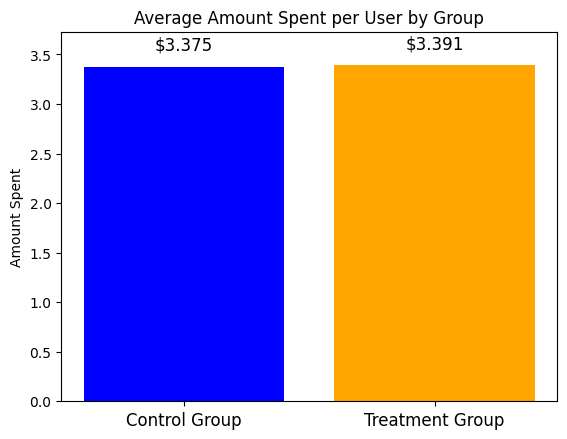

In [78]:
# Create a bar chart with the average amount spent per user for each group
labels = ['Control Group', 'Treatment Group']
values = [avg_spent_control_rounded, avg_spent_treatment_rounded]
colors = ['blue', 'orange']

plt.bar(labels, values, color=colors)
plt.title('Average Amount Spent per User by Group')
plt.ylabel('Amount Spent')
plt.ylim(0, max(values) * 1.1)  # Set y-axis limit to slightly above maximum value
plt.xticks(fontsize=12)

# Add the values on top of the bars with dollar sign
for i, v in enumerate(values):
    plt.text(i, v * 1.05, '${:.3f}'.format(v), fontsize=12, ha='center')

plt.show()

In [96]:
#Calculate the 95% confidence interval for the average amount spent per user in the treatment group?
#Filter the DataFrame to select only the data for the treatment group
treatment_data = data[data['group'] == 'B']['spent']

# Calculate the sample size, sample mean, and sample standard deviation for the treatment group
n_treatment = len(treatment_data)
mean = treatment_data.mean()
std_dev_treatment = treatment_data.std(ddof=1)

# Calculate the standard error of the mean
std_error_treatment = std_dev_treatment / (n_treatment ** 0.5)

# Calculate the t-score based on the 95% confidence level and degrees of freedom
t_score = st.t.ppf(0.975, df=n_treatment-1)

# Calculate the margin of error
margin_of_error = t_score * std_error_treatment

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

# Print the 95% confidence interval for the average amount spent per user in the treatment group
print("95% confidence interval for the average amount spent per user in the treatment group: [{:.3f}, {:.3f}]".format(lower_bound, upper_bound))

95% confidence interval for the average amount spent per user in the treatment group: [3.073, 3.708]


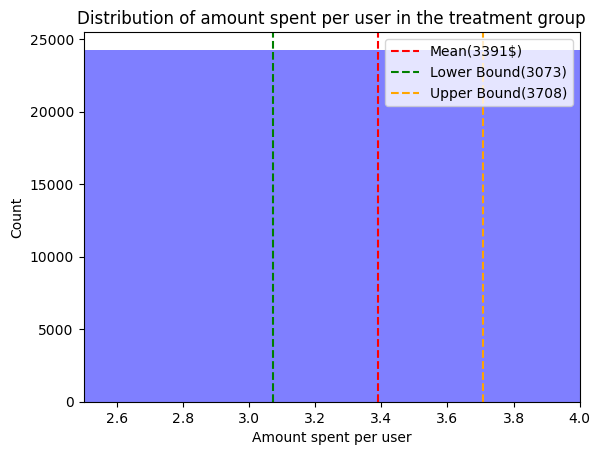

In [97]:
# Plot a histogram of the treatment group data
plt.hist(treatment_data, bins=20, alpha=0.5, color='blue')

# Add a vertical line for the mean
plt.axvline(mean, color='red', linestyle='--', label='Mean(3391$)')

# Add vertical lines for the lower and upper bounds
plt.axvline(lower_bound, color='green', linestyle='--', label='Lower Bound(3073)')
plt.axvline(upper_bound, color='orange', linestyle='--', label='Upper Bound(3708)')

# Add legend and labels
plt.legend()
plt.xlabel('Amount spent per user')
plt.ylabel('Count')
plt.title('Distribution of amount spent per user in the treatment group')

# Set x-axis limits to ensure bounds are visible
plt.xlim([2.5, 4])

# Show the plot
plt.show()

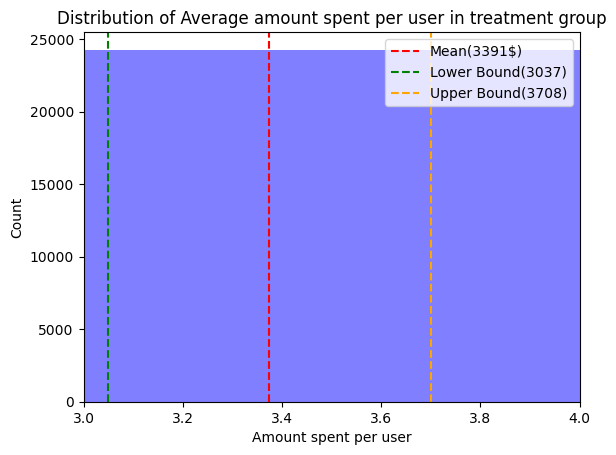

In [95]:
# Plot a histogram of the treatment group data
plt.hist(treatment_data, bins=20, alpha=0.5, color='blue')

# Add a vertical line for the mean
plt.axvline(mean, color='red', linestyle='--', label='Mean(3391$)')

# Add vertical lines for the lower and upper bounds
plt.axvline(lower_bound, color='green', linestyle='--', label='Lower Bound(3037)')
plt.axvline(upper_bound, color='orange', linestyle='--', label='Upper Bound(3708)')

# Add legend and labels
plt.legend()
plt.xlabel('Amount spent per user')
plt.ylabel('Count')
plt.title('Distribution of Average amount spent per user in treatment group')

# Set x-axis limits to ensure bounds are visible
plt.xlim([3, 4])

# Show the plot
plt.show()

In [98]:
# What is the 95% confidence interval for the average amount spent per user in the control?

#To calculate the 95% confidence interval for the average amount spent per user in the control group using the t-distribution, you can use the following steps:
#Filter the DataFrame to select only the data for the control group.
#Calculate the sample size, sample mean, and sample standard deviation for the control group.
#Calculate the standard error of the mean using the formula std_dev / sqrt(n), where std_dev is the sample standard deviation and n is the sample size.
#Calculate the t-score based on the 95% confidence level and degrees of freedom (df = n - 1) using the t.ppf() function from scipy.stats.
#Calculate the margin of error using the formula t_score * std_error, where t_score is the t-score and std_error is the standard error of the mean.
#Calculate the lower and upper bounds of the confidence interval using the formulas mean - margin_of_error and mean + margin_of_error, where mean is the sample mean.
#Print the 95% confidence interval for the average amount spent per user in the control group.

# Filter the DataFrame to select only the data for the control group
control_data = data[data['group'] == 'A']['spent']

# Calculate the sample size, sample mean, and sample standard deviation for the control group
n_control = len(control_data)
mean = control_data.mean()
std_dev_control = control_data.std(ddof=1)

# Calculate the standard error of the mean
std_error_control = std_dev_control / (n_control ** 0.5)

# Calculate the t-score based on the 95% confidence level and degrees of freedom
t_score = st.t.ppf(0.975, df=n_control-1)

# Calculate the margin of error
margin_of_error = t_score * std_error_control

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

# Print the 95% confidence interval for the average amount spent per user in the control group
print("95% confidence interval for the average amount spent per user in the control group: [{:.3f}, {:.3f}]".format(lower_bound, upper_bound))

95% confidence interval for the average amount spent per user in the control group: [3.049, 3.700]


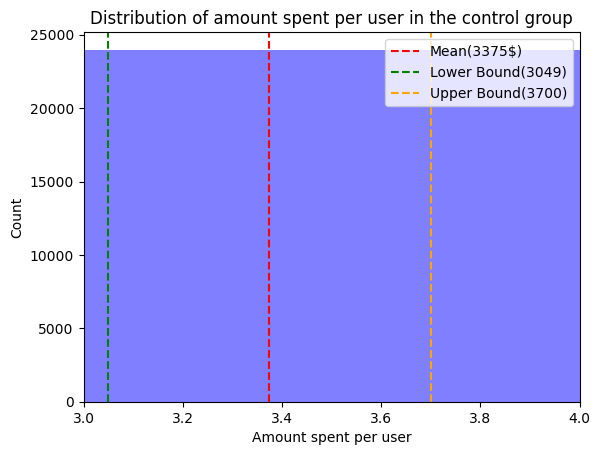

In [99]:
# Plot a histogram of the treatment group data
plt.hist(control_data, bins=20, alpha=0.5, color='blue')

# Add a vertical line for the mean
plt.axvline(mean, color='red', linestyle='--', label='Mean(3375$)')

# Add vertical lines for the lower and upper bounds
plt.axvline(lower_bound, color='green', linestyle='--', label='Lower Bound(3049)')
plt.axvline(upper_bound, color='orange', linestyle='--', label='Upper Bound(3700)')

# Add legend and labels
plt.legend()
plt.xlabel('Amount spent per user')
plt.ylabel('Count')
plt.title('Distribution of amount spent per user in the control group')

# Set x-axis limits to ensure bounds are visible
plt.xlim([3, 4])

# Show the plot
plt.show()

In [88]:
# Create a horizontal line for the average amount spent per user in the control group
plt.axhline(y=mean, color='blue', label='Average Amount Spent')

# Create vertical lines for the lower and upper bounds
plt.axvline(x=lower_bound, color='red', label='Lower Bound')
plt.axvline(x=upper_bound, color='green', label='Upper Bound')

# Set the plot title and axis labels
plt.title('95% Confidence Interval for Control Group')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')

# Show the legend
plt.legend()

# Add text for the numerical values of the average amount spent and the lower and upper bounds
plt.text(lower_bound - 20, 250, f"Lower Bound: {lower_bound:.2f}", rotation=90)
plt.text(upper_bound + 5, 250, f"Upper Bound: {upper_bound:.2f}", rotation=90)
plt.text(mean - 30, 280, f"Average Amount Spent: {mean:.2f}")

# Show the plot
plt.show()

<Figure size 640x480 with 1 Axes>

<class 'ValueError'>: Image size of 24477x275694 pixels is too large. It must be less than 2^16 in each direction.